
start is on field 0, end is on field n (total of n+1 playing fields)

In [241]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [320]:
def create_random_snakes_and_ladders (n, n_s, n_l):
    unused_fields = list(range(1,n))
    snakes = []
    for i in range(n_s):
        pick = [0,0]
        for j in range(2):
            pick[j] = random.choice(unused_fields)
            unused_fields.remove(pick[j])
        pick.sort(reverse=True)
        snakes.append(pick)
        #print(pick)
    ladders = []
    for i in range(n_l):
        pick = []
        for j in range(2):
            pick.append(random.choice(unused_fields))
            unused_fields.remove(pick[j])
        #print(type(pick.int()))
        pick.sort() # sorts in place
        ladders.append(pick)
        #print(pick)
    return(snakes,ladders)

# test
# create_random_snakes_and_ladders(100,5,5)

def create_game (n, n_snakes, n_ladders):
    # define field
    snakes, ladders = create_random_snakes_and_ladders(n,n_snakes,n_ladders)

    # check that no ladder and snake share a field
    flat_ladders = [item for sublist in ladders for item in sublist]
    flat_snakes = [item for sublist in snakes for item in sublist]
    for number in flat_snakes:
        if number in flat_ladders:
            print("ERROR: ladders and snakes cannot start or end on same fields! But they do! field: "+str(number))
            print("snakes: "+str(snakes))
            print("ladders: "+str(ladders))
        if number == n:
            print("ERROR: last field cannot be part of a snake")
    # check that all ladders and snakes are 2 element long
    snake_lengths = [len(x) for x in snakes]
    ladder_lengths = [len(x) for x in ladders]
    if sum(snake_lengths) != len(snakes)*2 :
        print("ERROR: each snake needs to have exactly 2 elements!")
        print("snakes: "+str(snakes))
    if sum(ladder_lengths) != len(ladders)*2:
        print("ERROR: each ladder needs to have exactly 2 elements!")
        print("ladders: "+str(ladders))

    ## create transition matrix
    # initialize as all 0
    T = np.array([[0 for i in range(n+1)] for i in range(n+1)],dtype=np.float)

    # add next fields (be careful with goal)
    for i in range(0,n):
        #row = T[i,:]
        #print(i)
        pre = [0 for k in range(i+1) if i < n]
        preds = [1/6 for k in range(min(6,n-i))]
        preds[-1] = preds[-1] + (6-min(6,n-i))*1/6
        post = [0 for k in range(n+1 - 6-(i+1)) if i <= (n+1 - 6)]
        ### NOT WOKRING
        T[i,:] = np.array([pre+preds+post])
        #print(pre+preds+post)
    T[-1] = T[-2]  

    if sum(np.sum(T,axis=1)) != n+1:
        print("something is wrong with the transition matrix!")

    ## add snakes and ladders
    for snake in snakes:
        for row in T:
            row[snake[1]] = row[snake[1]] + row[snake[0]]
            row[snake[0]] = 0

    # create state vector, start on field 0
    I = np.array([0 for i in range(n+1)],dtype=np.float)
    I[0]=1

    # compute p_finished
    max_runs = 2*n
    states = [I]
    for i in range(1,max_runs+1):
        I.dot(T)
        states.append(states[-1].dot(T))

    p_finished = [row[-1] for row in states]
    return(p_finished)

#create_game (10, 2, 2)

Median:  17
Median:  15
Median:  13
Median:  15
Median:  15
Median:  14
Median:  16
Median:  17
Median:  13
Median:  14
Median:  14
Median:  14
Median:  15
Median:  12
Median:  13
Median:  14
number of fields: 50
Number of ladders: 10
[[9, 31], [30, 37], [25, 46], [7, 22], [12, 41], [10, 18], [2, 3], [35, 44], [23, 29], [1, 47]]
Number of snakes: 5
[[33, 21], [38, 14], [45, 34], [49, 36], [39, 20]]


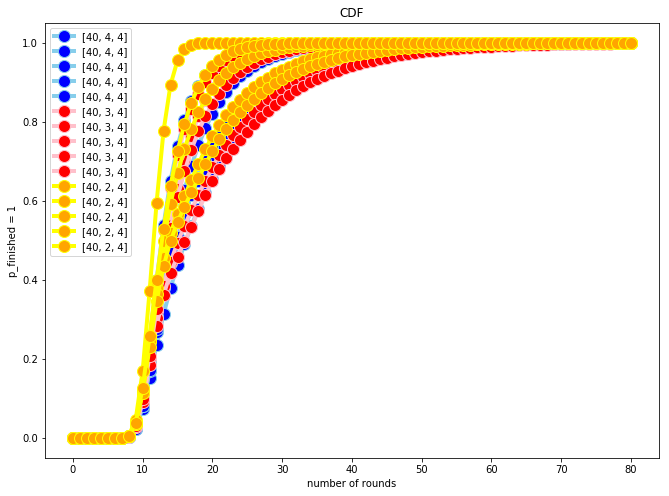

In [335]:
p_finished = create_game (n, n_snakes, n_ladders)

colors = [['blue','skyblue'],['red','pink'],['orange','yellow']]
config = [[40,4,4],[40,3,4],[40,2,4]]
plt.figure(figsize=(11,8))
for i in range(3):
    for j in range(5):
        p_finished[j] = create_game (config[i][0], config[i][1], config[i][2])
        plt.plot( p_finished[j], marker='o', markerfacecolor=colors[i%len(colors)][0], markersize=12, color=colors[i%len(colors)][1], linewidth=4,label=str(config[i]))
        median = sum(num < 0.5 for num in p_finished[j])
        print('Median:  '+str(median))
        # plot PDF, CDF, mean, mode


#plt.plot( p_finished[1], marker='o', markerfacecolor='red', markersize=12, color='pink', linewidth=4,label='p_finished[1]')
#plt.plot( p_finished[2], marker='o', markerfacecolor='orange', markersize=12, color='yellow', linewidth=4,label='p_finished[2]')
plt.legend(loc='best')
plt.xlabel('number of rounds')
plt.ylabel('p_finished = 1')
plt.title('CDF')

# calculate som statistics
median = sum(i < 0.5 for i in p_finished[0])
print('Median:  '+str(median))
print('number of fields: '+str(n))
print('Number of ladders: '+str(len(ladders)))
print(ladders)
print('Number of snakes: '+str(len(snakes)))
print(snakes)
# extra: 
# use it to create field
# create random snakes and ladders (fullfilling the conditions (no common fields, not n))

Median:  26
number of fields: 50
Number of ladders: 10
[[9, 31], [30, 37], [25, 46], [7, 22], [12, 41], [10, 18], [2, 3], [35, 44], [23, 29], [1, 47]]
Number of snakes: 5
[[33, 21], [38, 14], [45, 34], [49, 36], [39, 20]]


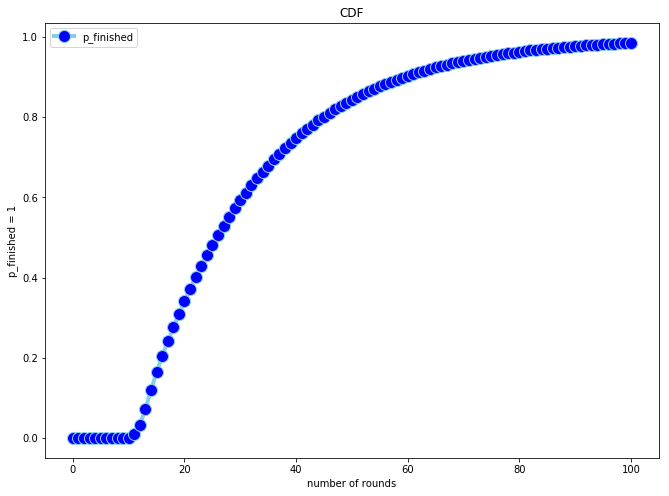

In [318]:
# define field
n = 50
n_snakes = 5
n_ladders = 10
## define snakes and ladders
#snakes = [[99,1],[50,10],[91,11],[95,12]]
#ladders = [[2,49],[51,90]]

snakes, ladders = create_random_snakes_and_ladders(n,n_snakes,n_ladders)

# check that no ladder and snake share a field
flat_ladders = [item for sublist in ladders for item in sublist]
flat_snakes = [item for sublist in snakes for item in sublist]
for number in flat_snakes:
    if number in flat_ladders:
        print("ERROR: ladders and snakes cannot start or end on same fields! But they do! field: "+str(number))
        print("snakes: "+str(snakes))
        print("ladders: "+str(ladders))
    if number == n:
        print("ERROR: last field cannot be part of a snake")
# check that all ladders and snakes are 2 element long
snake_lengths = [len(x) for x in snakes]
ladder_lengths = [len(x) for x in ladders]
if sum(snake_lengths) != len(snakes)*2 :
    print("ERROR: each snake needs to have exactly 2 elements!")
    print("snakes: "+str(snakes))
if sum(ladder_lengths) != len(ladders)*2:
    print("ERROR: each ladder needs to have exactly 2 elements!")
    print("ladders: "+str(ladders))

## create transition matrix
# initialize as all 0
T = np.array([[0 for i in range(n+1)] for i in range(n+1)],dtype=np.float)

# add next fields (be careful with goal)
for i in range(0,n):
    #row = T[i,:]
    #print(i)
    pre = [0 for k in range(i+1) if i < n]
    preds = [1/6 for k in range(min(6,n-i))]
    preds[-1] = preds[-1] + (6-min(6,n-i))*1/6
    post = [0 for k in range(n+1 - 6-(i+1)) if i <= (n+1 - 6)]
    ### NOT WOKRING
    T[i,:] = np.array([pre+preds+post])
    #print(pre+preds+post)
T[-1] = T[-2]  

if sum(np.sum(T,axis=1)) != n+1:
    print("something is wrong with the transition matrix!")

## add snakes and ladders
for snake in snakes:
    for row in T:
        row[snake[1]] = row[snake[1]] + row[snake[0]]
        row[snake[0]] = 0

# create state vector, start on field 0
I = np.array([0 for i in range(n+1)],dtype=np.float)
I[0]=1

# compute p_finished
max_runs = 2*n
states = [I]
for i in range(1,max_runs+1):
    I.dot(T)
    states.append(states[-1].dot(T))
    
p_finished = [row[-1] for row in states]




In [229]:
sum(i < 0.5 for i in p_finished)

65

# Sandbox

In [250]:
unused_fields = list(range(1,n))
for i in range(100):
    print(unused_fields)
    pick = random.choice(unused_fields)
    unused_fields.remove(pick)
    print(pick)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
33
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
11
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60

IndexError: Cannot choose from an empty sequence

In [203]:
I
states
states = np.array([[] for i in range(n)],dtype=np.float)
states[0] = I
states[1] = states[0].dot(T)
states

ValueError: could not broadcast input array from shape (11) into shape (0)

In [281]:
tmp = [2,1,5,2,9,0]
tmp[0]=8
tmp.sort()
tmp

[0, 1, 2, 5, 8, 9]